In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import defaultdict
import random
import numpy as np

## Visualization of the dataset structure

In [6]:
dataset_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'data', 'raw', 'dataset-resized'))
class_names = os.listdir(dataset_path)
class_names

['paper', '.DS_Store', 'metal', 'cardboard', 'trash', 'glass', 'plastic']

In [22]:
class_names = [cls for cls in os.listdir(
    dataset_path) if not cls.startswith('.')]

class_counts = {cls: len([f for f in os.listdir(os.path.join(dataset_path, cls))
                         if not f.startswith('.')])
                for cls in class_names}

for cls, count in class_counts.items():
    print(f"{cls}: {count}")

paper: 594
metal: 410
cardboard: 403
trash: 137
glass: 501
plastic: 482


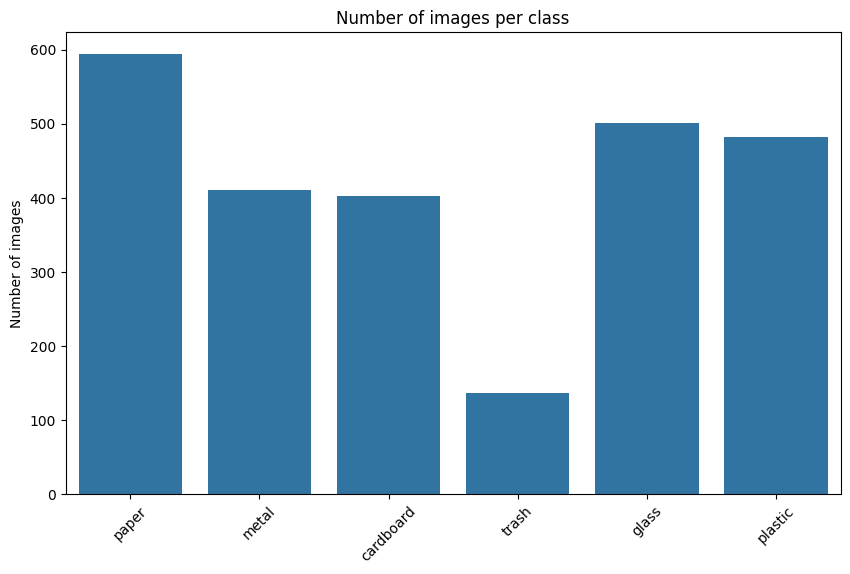

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Number of images per class")
plt.ylabel("Number of images")
plt.xticks(rotation=45)
plt.show()


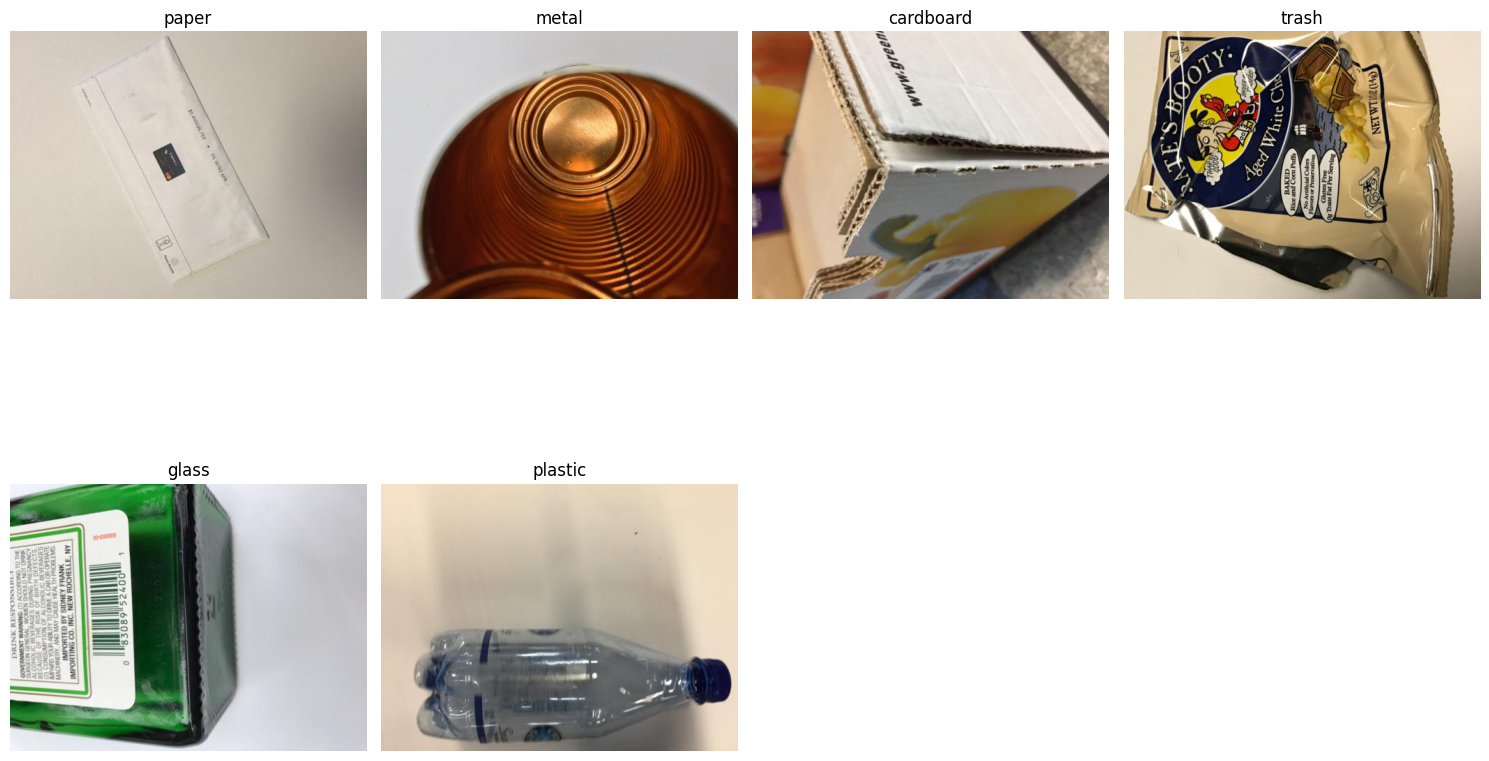

In [27]:
def plot_sample_images(dataset_path, class_names):
    plt.figure(figsize=(15, 10))
    for i, cls in enumerate(class_names):
        class_path = os.path.join(dataset_path, cls)
        sample_image = random.choice(os.listdir(class_path))
        img = Image.open(os.path.join(class_path, sample_image))
        plt.subplot(2, 4, i+1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_images(dataset_path, class_names)


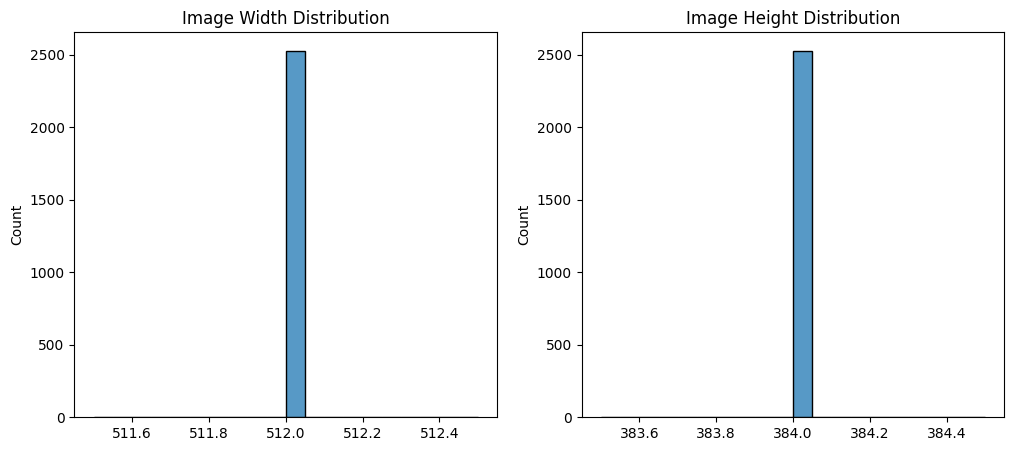

In [25]:
img_shapes = []

for cls in class_names:
    class_path = os.path.join(dataset_path, cls)
    for img_file in os.listdir(class_path):
        img = Image.open(os.path.join(class_path, img_file))
        img_shapes.append(img.size)

widths, heights = zip(*img_shapes)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(widths, bins=20)
plt.title("Image Width Distribution")

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=20)
plt.title("Image Height Distribution")

plt.show()


In [26]:
def check_corrupt_images(dataset_path):
    corrupt = []
    for cls in class_names:
        for file in os.listdir(os.path.join(dataset_path, cls)):
            try:
                img = Image.open(os.path.join(dataset_path, cls, file))
                img.verify()
            except:
                corrupt.append(os.path.join(cls, file))
    return corrupt

corrupt_images = check_corrupt_images(dataset_path)
print("Corrupt images found:", len(corrupt_images))


Corrupt images found: 0


In [28]:
total_images = sum(class_counts.values())
for cls in class_counts:
    percent = (class_counts[cls] / total_images) * 100
    print(f"{cls}: {percent:.2f}% of dataset")


paper: 23.51% of dataset
metal: 16.22% of dataset
cardboard: 15.95% of dataset
trash: 5.42% of dataset
glass: 19.83% of dataset
plastic: 19.07% of dataset


## Summary of data exploration

- The dataset contains 2527 images
- The dataset consists of 6 different classes: cardboard, glass, metal, paper, plastic, trash, 
- The size of images is 512x384 pixels.
- The dataset has an imbalanced distribution with 15.95% cardboard, 19.83% glass, 16.22% metal, 23.51% paper, 19.07% plastic, 5.42% trash
- There are no corrupt images in the dataset.